## Gas Sensor Array Drift 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import tempfile
import os

### Data Reading 

In [51]:
list_features = []
list_targets = []

# Define a function to handle reading and cleaning the data
def read_and_clean_svmlight(file_path):
    with open(file_path, 'r') as file:
        data = file.read().replace(';', '')  # Remove semicolons

    with tempfile.NamedTemporaryFile(delete=False, mode='w') as tmp_file:
        tmp_file.write(data)
        tmp_file_path = tmp_file.name
    
    X, y = load_svmlight_file(tmp_file_path, dtype=np.float64, zero_based=False)
    X = pd.DataFrame(X.toarray())
    y = pd.Series(y)
    
    os.remove(tmp_file_path)
    
    # Extract first digit from each value in y
    y = y.apply(lambda x: int(str(x)[0]))  # Convert to string, take first character, and convert back to int
    
    return X, y

# Loop through each batch file from batch1.dat to batch10.dat
for i in range(1, 11):
    X, y = read_and_clean_svmlight(f'batch{i}.dat')
    list_features.append(X)
    list_targets.append(y)

# Concatenate all DataFrames and Series
X = pd.concat(list_features, ignore_index=True)
y = pd.concat(list_targets, ignore_index=True)

In [52]:
print(X.shape)
X.head()

(13910, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


## Min-Max data scaling (-1 to 1)

In [53]:
scaler = MinMaxScaler(feature_range=(-1, 1))
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [54]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.905872,-0.997343,-0.971612,-0.975257,-0.984879,0.958387,0.795490,0.865034,-0.878662,-0.998106,...,0.757627,0.941052,-0.784112,-0.854664,-0.967450,-0.995176,-0.986399,0.964157,0.763942,0.947373
1,-0.874435,-0.996351,-0.935227,-0.942549,-0.984585,0.928190,0.775693,0.862033,-0.845751,-0.997632,...,0.746861,0.945275,-0.762410,-0.840881,-0.939320,-0.989122,-0.981219,0.941361,0.751117,0.951699
2,-0.828754,-0.994975,-0.901866,-0.907260,-0.976629,0.883323,0.746385,0.856738,-0.792863,-0.996824,...,0.726840,0.941742,-0.729302,-0.791153,-0.912999,-0.983409,-0.970060,0.911878,0.730715,0.948836
3,-0.826652,-0.994980,-0.854993,-0.856440,-0.919666,0.880565,0.744694,0.857085,-0.789712,-0.996811,...,0.721628,0.940969,-0.724868,-0.786506,-0.877101,-0.976055,-0.959714,0.905411,0.726073,0.948164
4,-0.782066,-0.993870,-0.862880,-0.861308,-0.964463,0.831314,0.713546,0.852045,-0.737248,-0.996058,...,0.698484,0.936418,-0.686562,-0.711911,-0.876364,-0.974309,-0.956094,0.872440,0.702171,0.940519


In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [56]:

dataset = pd.concat([X, y], axis=1)
dataset.to_csv('fulldataset.csv', index=False)

In [57]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,0
0,-0.905872,-0.997343,-0.971612,-0.975257,-0.984879,0.958387,0.795490,0.865034,-0.878662,-0.998106,...,0.941052,-0.784112,-0.854664,-0.967450,-0.995176,-0.986399,0.964157,0.763942,0.947373,1
1,-0.874435,-0.996351,-0.935227,-0.942549,-0.984585,0.928190,0.775693,0.862033,-0.845751,-0.997632,...,0.945275,-0.762410,-0.840881,-0.939320,-0.989122,-0.981219,0.941361,0.751117,0.951699,1
2,-0.828754,-0.994975,-0.901866,-0.907260,-0.976629,0.883323,0.746385,0.856738,-0.792863,-0.996824,...,0.941742,-0.729302,-0.791153,-0.912999,-0.983409,-0.970060,0.911878,0.730715,0.948836,1
3,-0.826652,-0.994980,-0.854993,-0.856440,-0.919666,0.880565,0.744694,0.857085,-0.789712,-0.996811,...,0.940969,-0.724868,-0.786506,-0.877101,-0.976055,-0.959714,0.905411,0.726073,0.948164,1
4,-0.782066,-0.993870,-0.862880,-0.861308,-0.964463,0.831314,0.713546,0.852045,-0.737248,-0.996058,...,0.936418,-0.686562,-0.711911,-0.876364,-0.974309,-0.956094,0.872440,0.702171,0.940519,1


In [10]:
dataset.shape

(13910, 129)

In [58]:
dataset.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       119, 120, 121, 122, 123, 124, 125, 126, 127,   0],
      dtype='int64', length=129)

In [77]:
dataset.columns = dataset.columns[:-1].tolist() + ['128']

In [78]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-0.905872,-0.997343,-0.971612,-0.975257,-0.984879,0.958387,0.795490,0.865034,-0.878662,-0.998106,...,0.941052,-0.784112,-0.854664,-0.967450,-0.995176,-0.986399,0.964157,0.763942,0.947373,1
1,-0.874435,-0.996351,-0.935227,-0.942549,-0.984585,0.928190,0.775693,0.862033,-0.845751,-0.997632,...,0.945275,-0.762410,-0.840881,-0.939320,-0.989122,-0.981219,0.941361,0.751117,0.951699,1
2,-0.828754,-0.994975,-0.901866,-0.907260,-0.976629,0.883323,0.746385,0.856738,-0.792863,-0.996824,...,0.941742,-0.729302,-0.791153,-0.912999,-0.983409,-0.970060,0.911878,0.730715,0.948836,1
3,-0.826652,-0.994980,-0.854993,-0.856440,-0.919666,0.880565,0.744694,0.857085,-0.789712,-0.996811,...,0.940969,-0.724868,-0.786506,-0.877101,-0.976055,-0.959714,0.905411,0.726073,0.948164,1
4,-0.782066,-0.993870,-0.862880,-0.861308,-0.964463,0.831314,0.713546,0.852045,-0.737248,-0.996058,...,0.936418,-0.686562,-0.711911,-0.876364,-0.974309,-0.956094,0.872440,0.702171,0.940519,1


## Data Seperation

In [79]:
# Define X and y
X = dataset.iloc[:, 1:]  # All columns except the first one
y = dataset.iloc[:, 0]   # The first column

# Verify the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (13910, 128)
Shape of y: (13910,)


## Feature Selection Using XGBoost

In [80]:
! pip install xgboost



In [81]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [82]:
X_train.shape

(11128, 128)

In [83]:
X_test.shape

(2782, 128)

In [84]:
y_train.shape

(11128,)

In [85]:
y_test.shape

(2782,)

In [86]:
regressor = xgb.XGBRegressor(
    base_score=0.5,
    booster='gbtree',
    objective='reg:squarederror',  # Objective function for regression
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='rmse'  # Evaluation metric for regression
)

# Fit the model
regressor.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=100)

# End time measurement
end = time.time()

[0]	validation_0-rmse:1.18956	validation_1-rmse:1.18465
[99]	validation_0-rmse:0.00372	validation_1-rmse:0.08454


In [87]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on test data
y_pred = regressor.predict(X_test)

# Calculate test accuracy using mean squared error
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse:.3f}")

Test Mean Squared Error: 0.007


In [88]:
def plot_feature_importance(model, top_n=10):
    """
    Plot the feature importance of a trained XGBoost model.

    Args:
        model (xgb.XGBRegressor): Trained XGBoost Regressor model.
        top_n (int): Number of top features to plot.

    Returns:
        None
    """
    feat_importances = pd.DataFrame(data=model.feature_importances_,
                                    index=model.feature_names_in_,
                                    columns=['importance'])
    # Sort feature importances and select top_n
    feat_importances = feat_importances.sort_values(by='importance', ascending=False).head(top_n)
    
    # Plot only the top_n features
    feat_importances.sort_values('importance').plot(kind='barh', title='Feature Importance')
    plt.show()

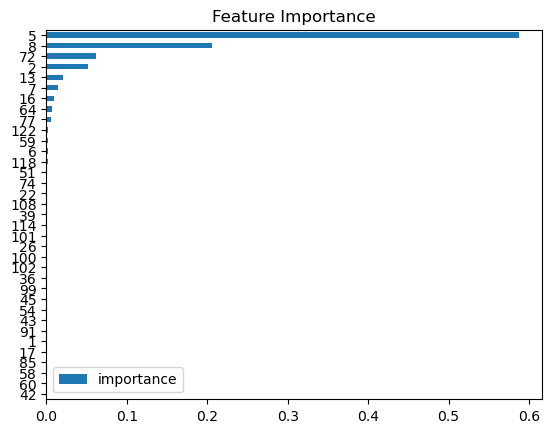

In [89]:
plot_feature_importance(regressor,35)

In [92]:
Final_Features = ['5',
'8','72','2','13','7','16','64','77','122','128']

In [93]:
X.columns = X.columns.astype(str)

# Then you don't need to convert Final_Features
# Just select the columns
X = X[Final_Features]

In [94]:
X.shape

(13910, 11)

In [109]:
#y.name = 'target'
new_dataset = pd.concat([X], axis=1)
new_dataset.to_csv('dataset_Update.csv', index=False)

In [110]:
new_dataset.shape

(13910, 11)

In [111]:
new_dataset.head(1)

,5,8,72,2,13,7,16,64,77,122,128
0,0.958387,-0.878662,-0.92981,-0.971612,0.944146,0.865034,-0.465786,-0.923203,0.945019,-0.96745,1


In [112]:
# Check total number of gases

last_column = new_dataset.iloc[:, -1].nunique()
print(last_column)

6


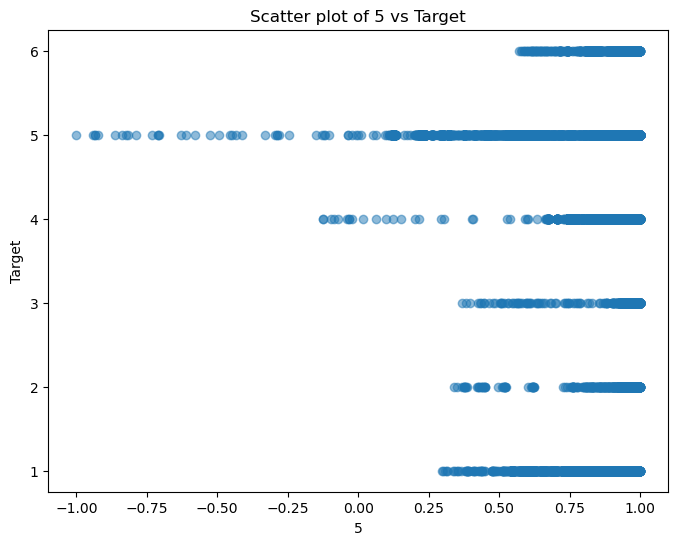

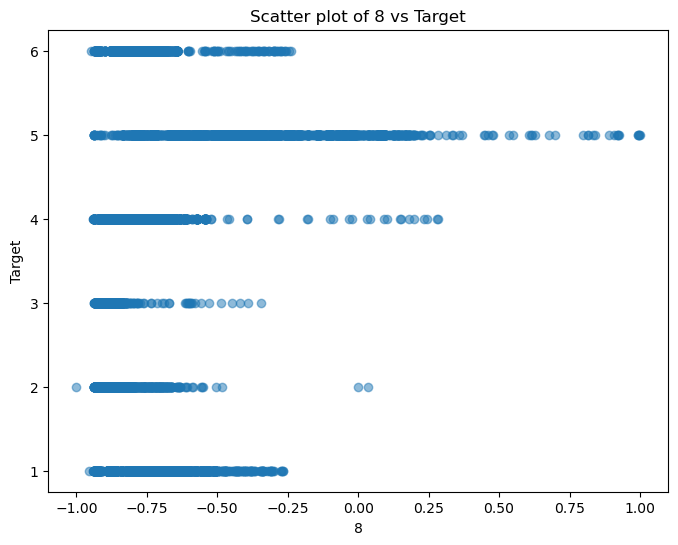

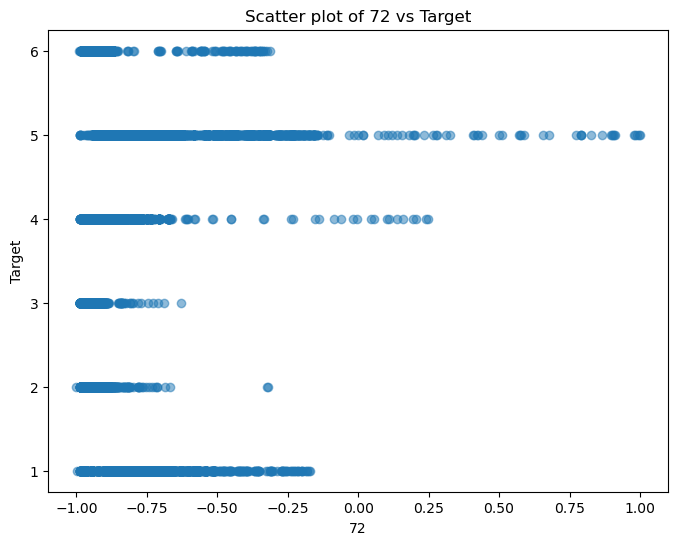

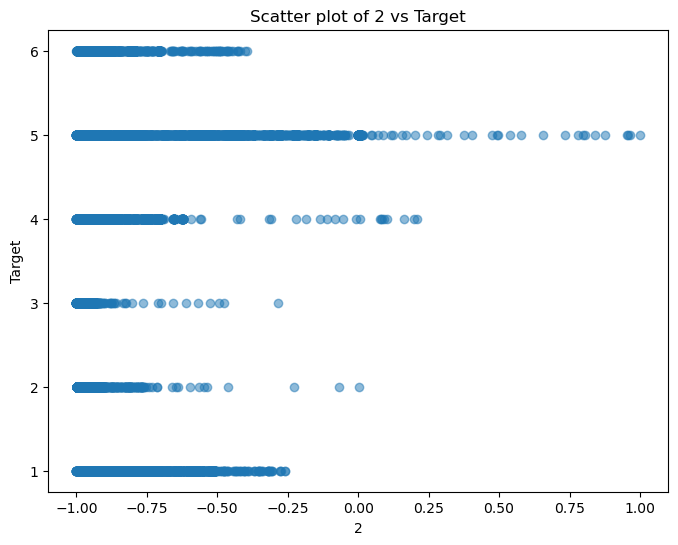

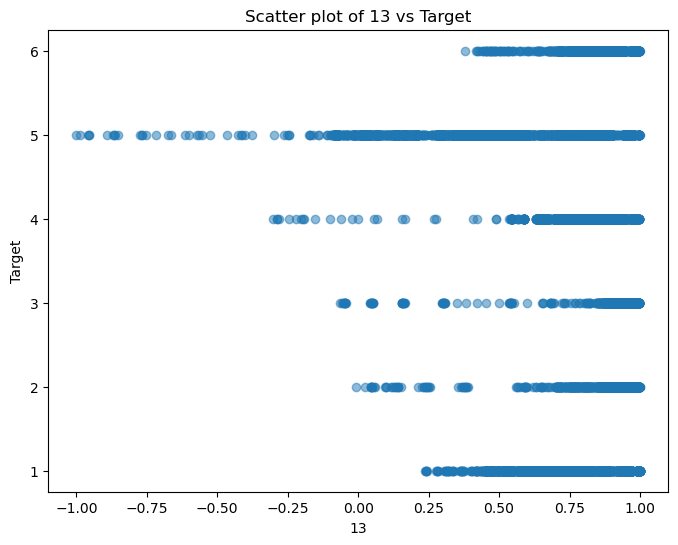

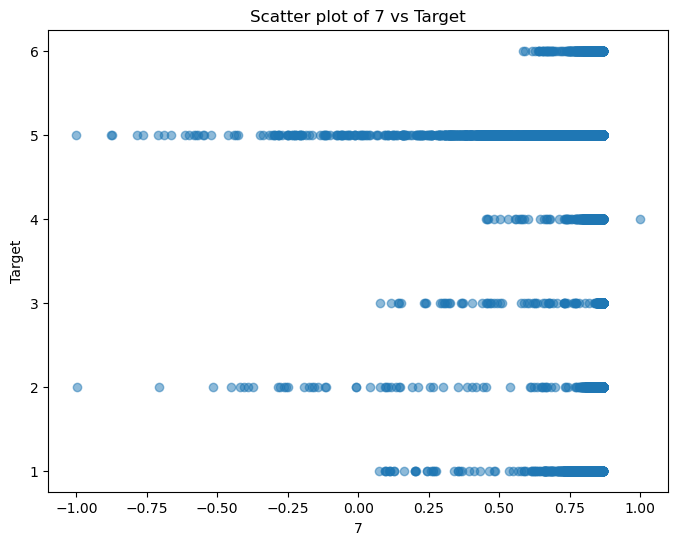

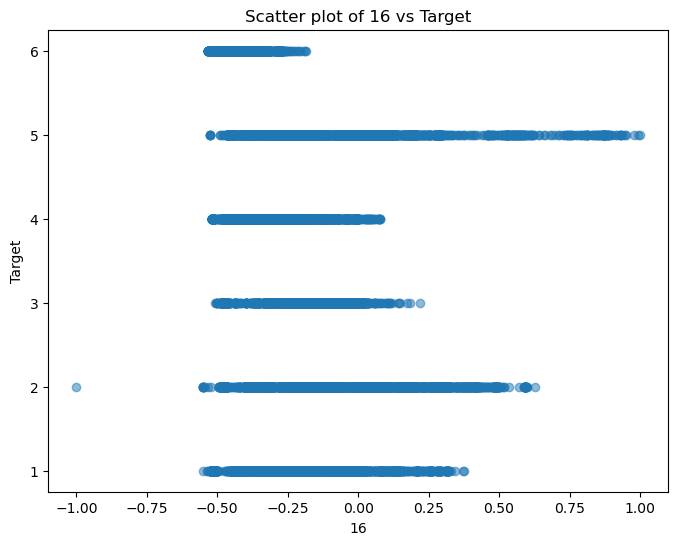

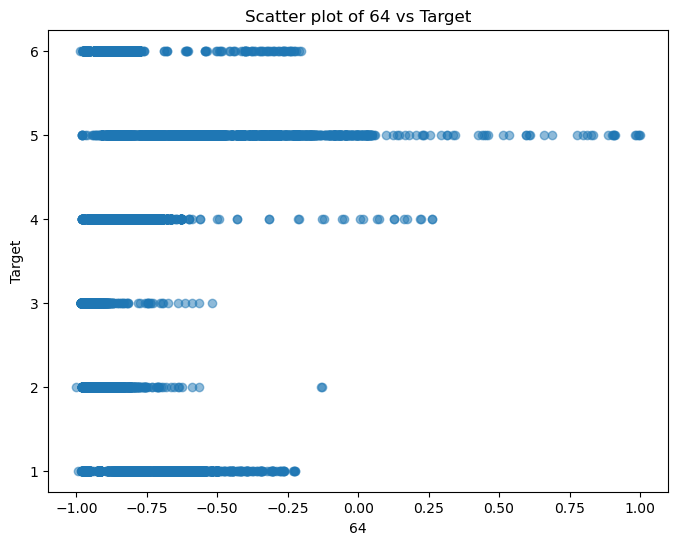

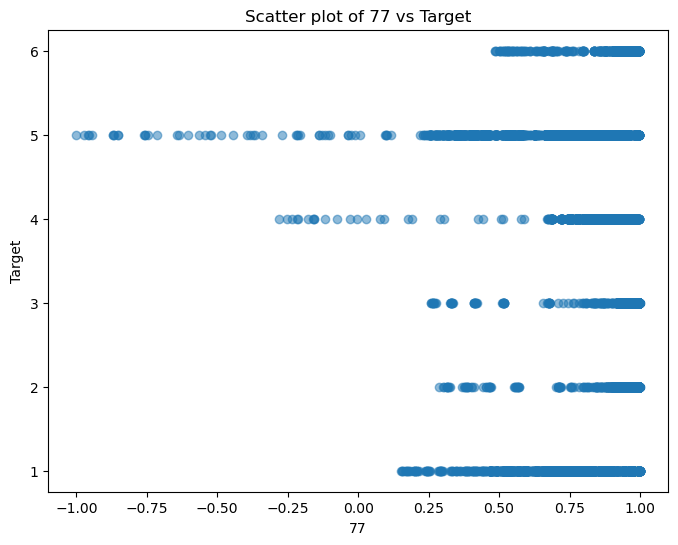

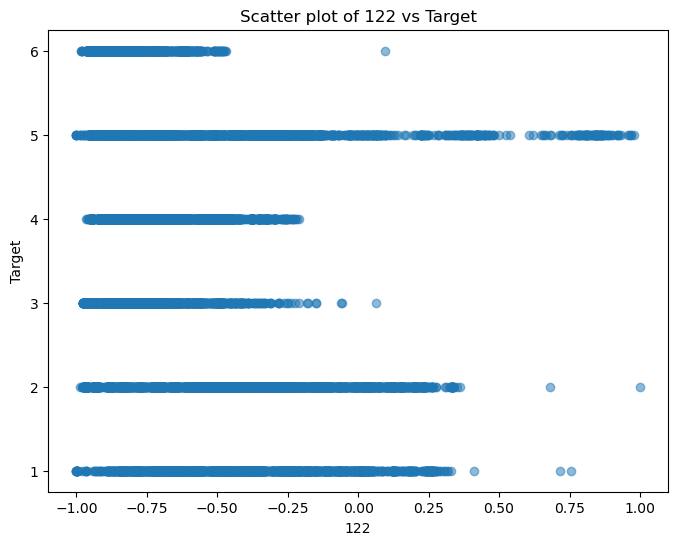

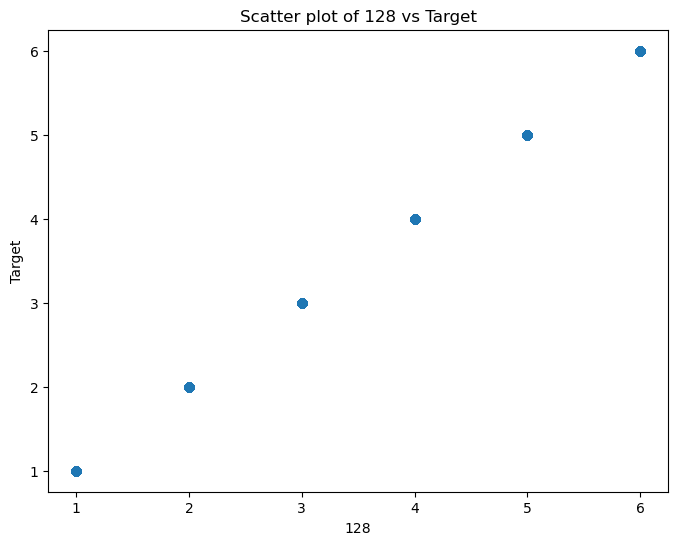

In [113]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(new_dataset[column],  new_dataset.iloc[:, -1], alpha=0.5)
    plt.title(f'Scatter plot of {column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.show()

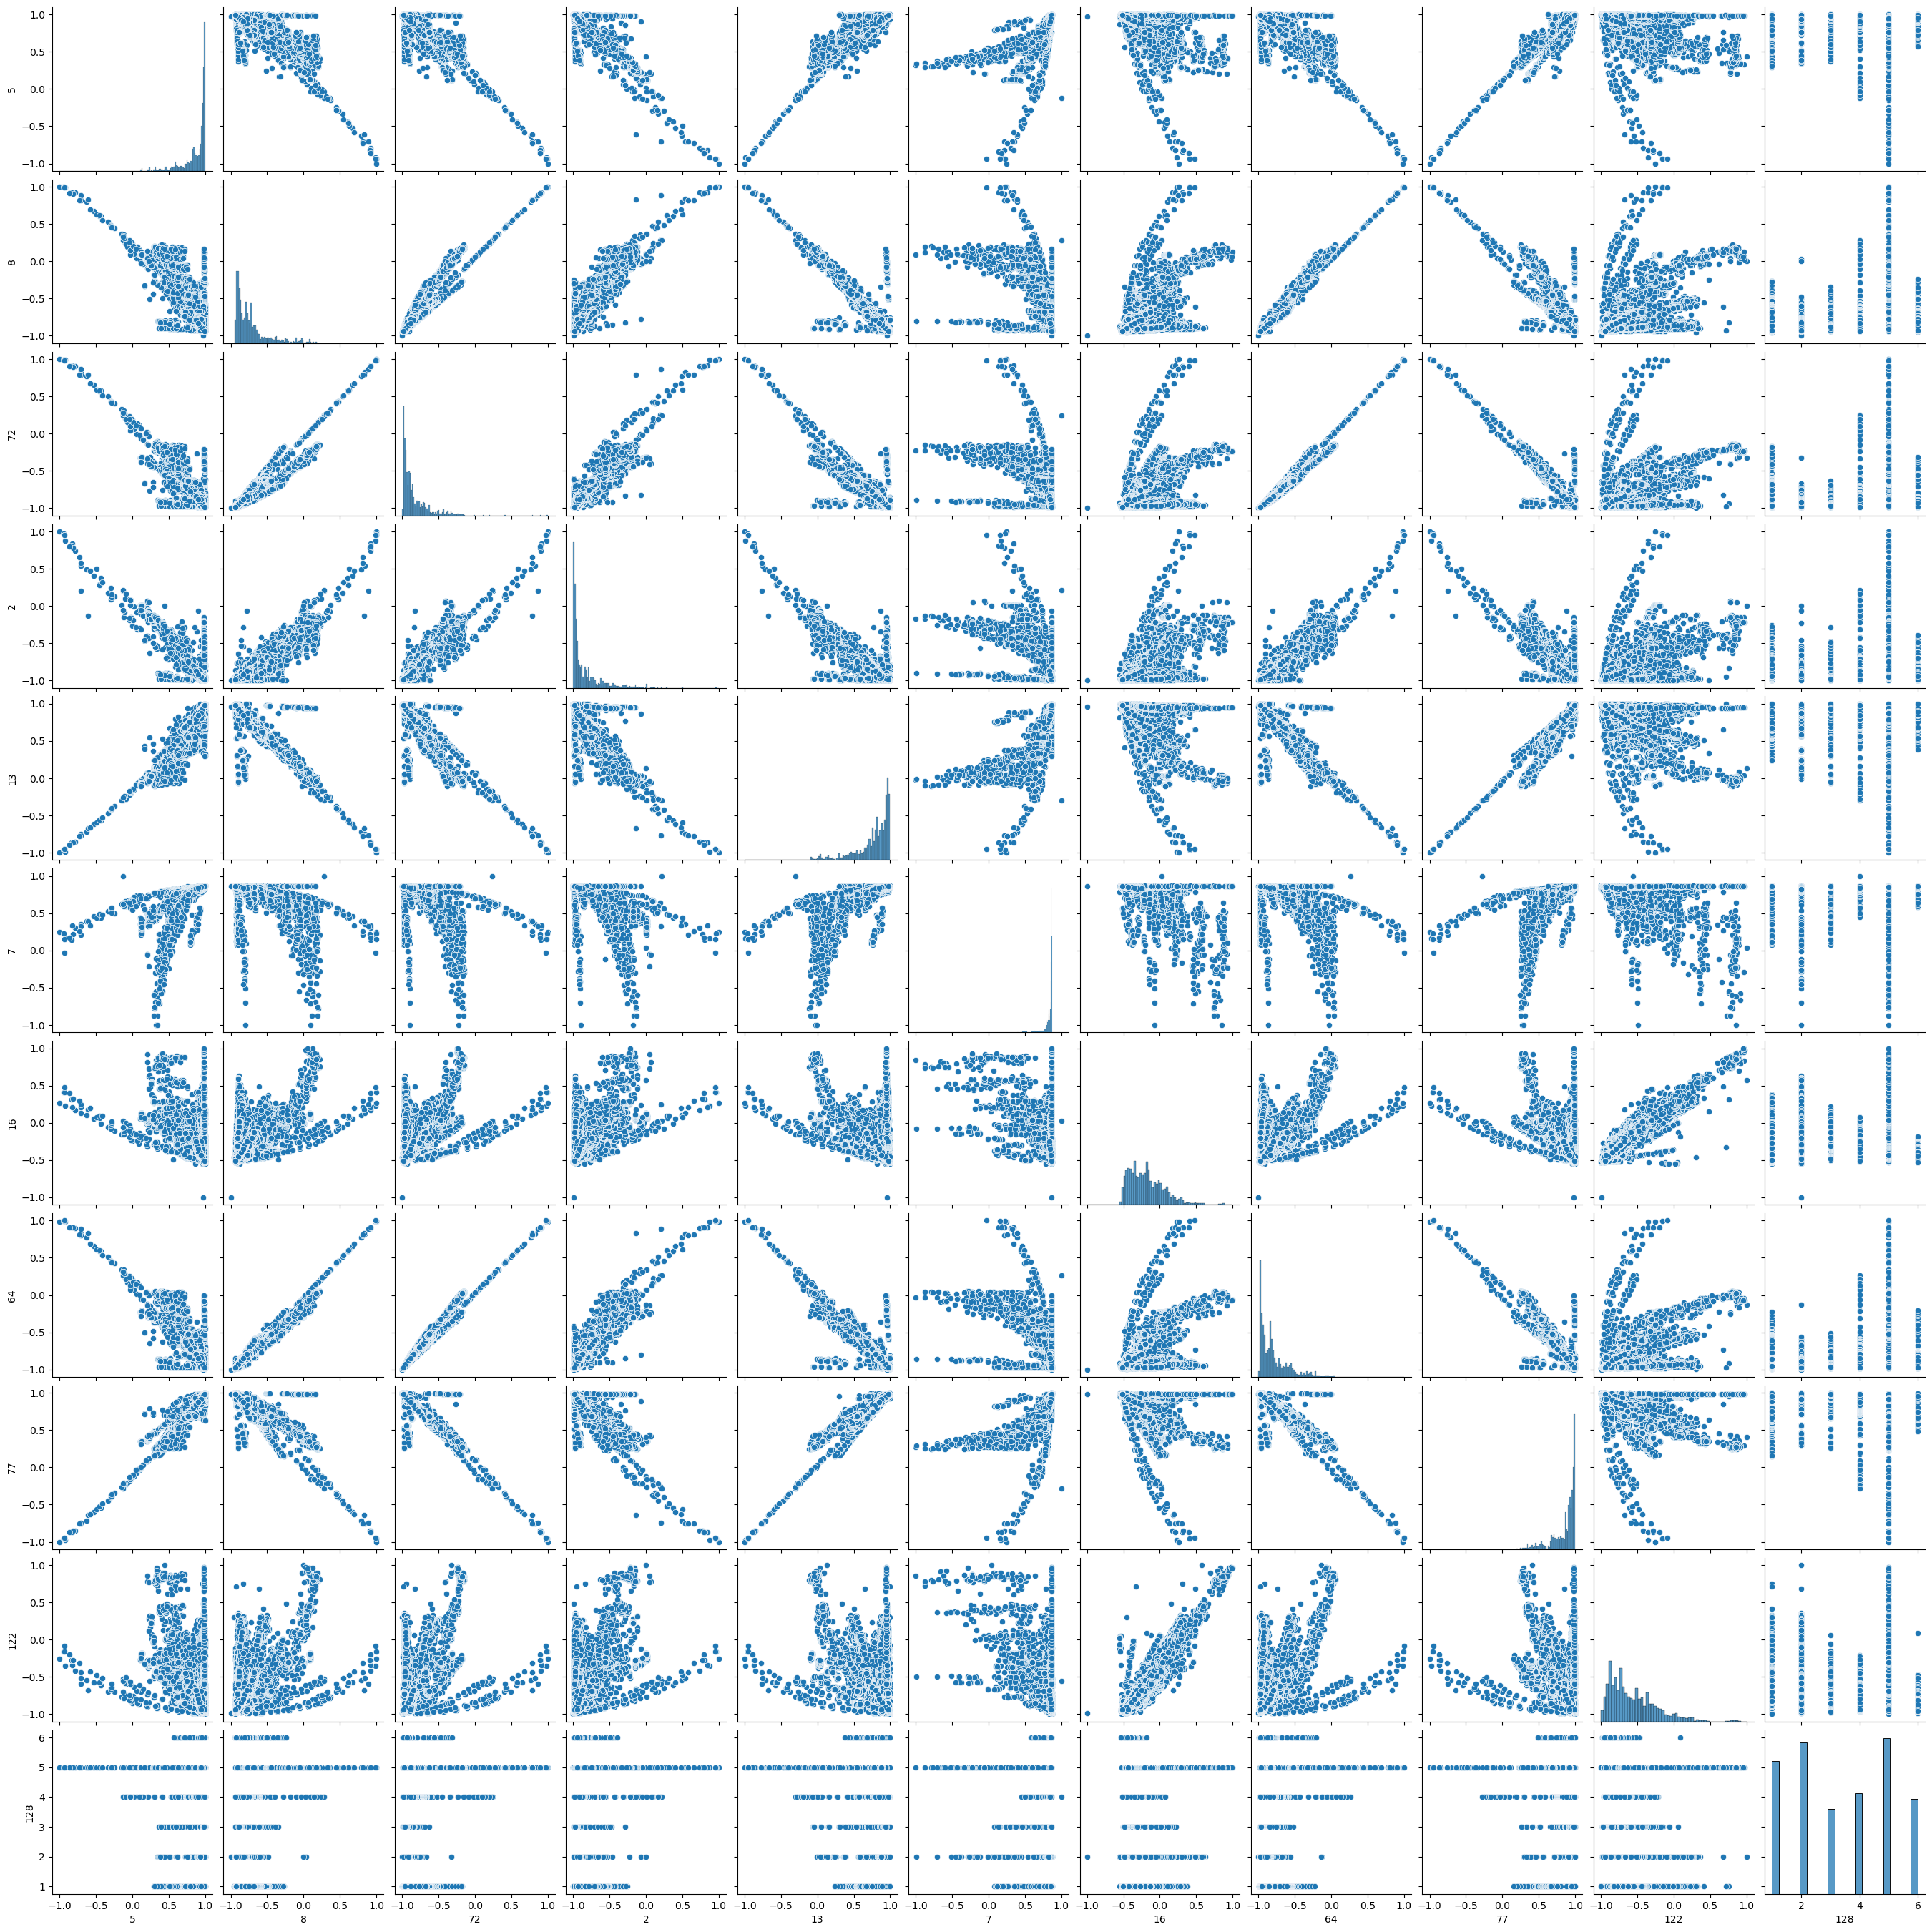

In [114]:
import seaborn as sns
# Pair plot
sns.pairplot(new_dataset)
plt.show()

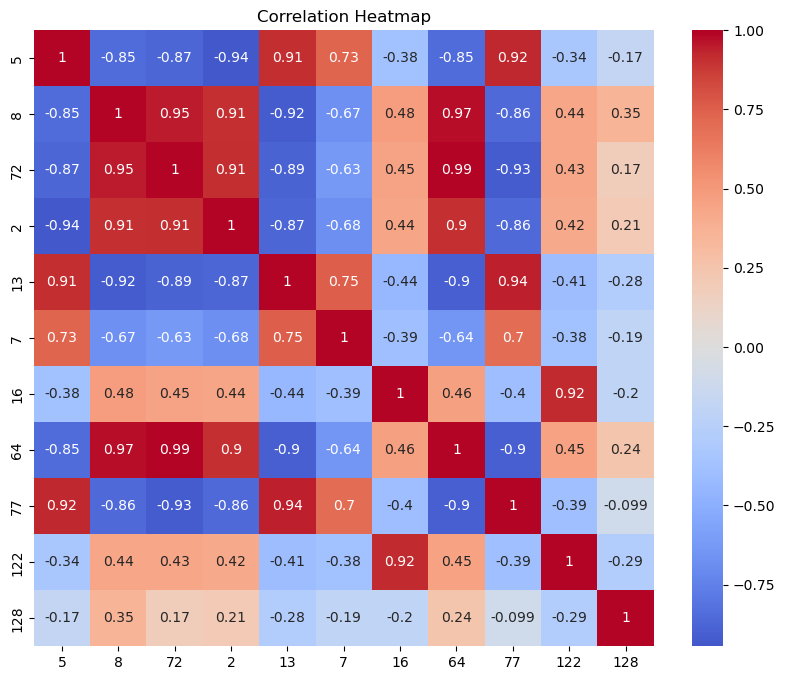

In [115]:
# Correlation heatmap
corr_matrix = new_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()